<a href="https://colab.research.google.com/github/Muvvahhed/Data-Science/blob/main/Nobel_Prize_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 261 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

Preliminary data exploration. 


In [ ]:
print(f"shape: {df_data.shape}, with {df_data.shape[0]} rows and {df_data.shape[1]} columns")
print(df_data.info())

shape: (962, 16), with 962 rows and 16 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 

In [ ]:
print(f"year the first Nobel prize was awarded: {df_data.year.min()}")
print(f"latest year included in the dataset: {df_data.year.max()}")

year the first Nobel prize was awarded: 1901
latest year included in the dataset: 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [ ]:
print(df_data.duplicated().values.any())

False


In [ ]:
df_data.isna().values.any()

True

### Check for NaN Values

In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [ ]:
separated_values = df_data.prize_share.astype(str).str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
sex_data = df_data.sex.value_counts()
fig = px.pie(
      labels=sex_data.index,
      values=sex_data.values,
      title="Nobel Prize Winners",
      names=sex_data.index,
      hole=0.6
    )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
first_female_laureates = df_data[df_data.sex == "Female"].sort_values("year", ignore_index=True).head(3)
first_female_laureates[["full_name", "category", "birth_country", "organization_name"]]

,full_name,category,birth_country,organization_name
0,"Marie Curie, née Sklodowska",Physics,Russian Empire (Poland),NaN
1,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,Austrian Empire (Czech Republic),NaN
2,Selma Ottilia Lovisa Lagerlöf,Literature,Sweden,NaN


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [ ]:
winners_df = df_data.groupby("full_name").agg({"full_name": pd.Series.count})
winners_df.rename(columns = {'full_name':'no_of_award'}, inplace = True)
winners_df[winners_df.no_of_award > 1].sort_values("no_of_award", ascending=False)

,no_of_award
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Frederick Sanger,2
John Bardeen,2
Linus Carl Pauling,2
"Marie Curie, née Sklodowska",2
Office of the United Nations High Commissioner for Refugees (UNHCR),2


In [ ]:
multiple_winners = df_data[df_data.duplicated(subset="full_name", keep=False)]
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


In [ ]:
df_data.full_name.value_counts().head(6)

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Marie Curie, née Sklodowska                                                          2
Name: full_name, dtype: int64

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [ ]:
df_data.category.nunique()

6

In [ ]:
prizes_by_cat = df_data.category.value_counts()
fig = px.bar(
    x=prizes_by_cat.index,
    y=prizes_by_cat.values,
    color=prizes_by_cat.values,
    color_continuous_scale='Aggrnyl',
    title="Awards Per Category",
    custom_data=[prizes_by_cat.index, prizes_by_cat.values]
)
fig.update_layout(
    xaxis_title = "Categories",
    yaxis_title = "Number of Awards",
    coloraxis_showscale=False,
)
fig.update_traces(
    hovertemplate = "Category=%{customdata[0]}<br>Awards=%{customdata[1]}"
)

fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
df_data[df_data.category == "Economics"].sort_values("year").head(1)[["year", "category", "full_name"]]

,year,category,full_name
393,1969,Economics,Jan Tinbergen


In [ ]:
df_data

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,100.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,100.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,100.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,50.00,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,50.00,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,33.33,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,100.00,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,25.00,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,25.00,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?


In [ ]:
df_winner_by_cat_and_gender = df_data.groupby(["category", "sex"], as_index=False).agg({"prize": pd.Series.count})
df_winner_by_cat_and_gender.rename(columns={"prize": "awards"}, inplace=True)
df_winner_by_cat_and_gender.sort_values("awards", ascending=False, inplace=True)

In [ ]:
fig = px.bar(
   df_winner_by_cat_and_gender,
   x="category",
   y="awards",
   color="sex",
   title="Nobel Laureates by Categories and Sex",
)
fig.update_layout(
    xaxis_title="Categories",
    yaxis_title="Number of Awards",
)
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 



In [ ]:
awards_by_year = df_data.groupby("year").agg({"prize": pd.Series.count})

In [ ]:
rolled_awards_by_year = awards_by_year.rolling(window=5).mean()

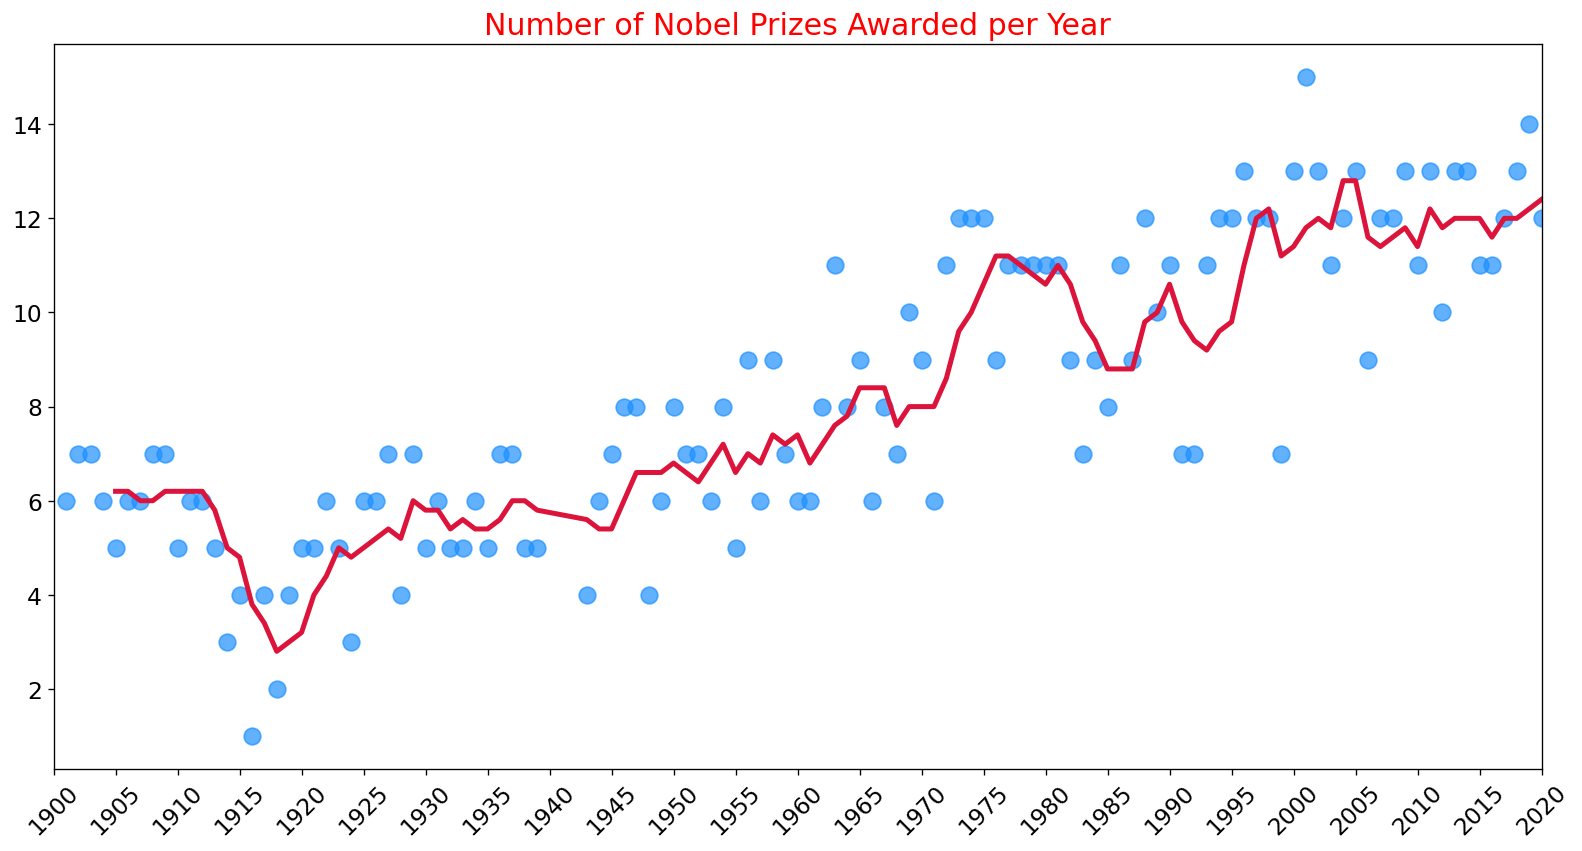

In [ ]:
plt.figure(figsize=(16,8), dpi=120)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18, color="red")
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14,
           rotation=45)

ax = plt.gca() 
ax.set_xlim(1900, 2020)

ax.scatter(awards_by_year.index, 
           awards_by_year.prize, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(awards_by_year.index, 
        rolled_awards_by_year.values, 
        c='crimson', 
        linewidth=3,)


In [ ]:
average_share_by_year = df_data.groupby(by="year").agg({"share_pct": pd.Series.mean})
rolled_average_share_by_year = average_share_by_year.rolling(window=5).mean()

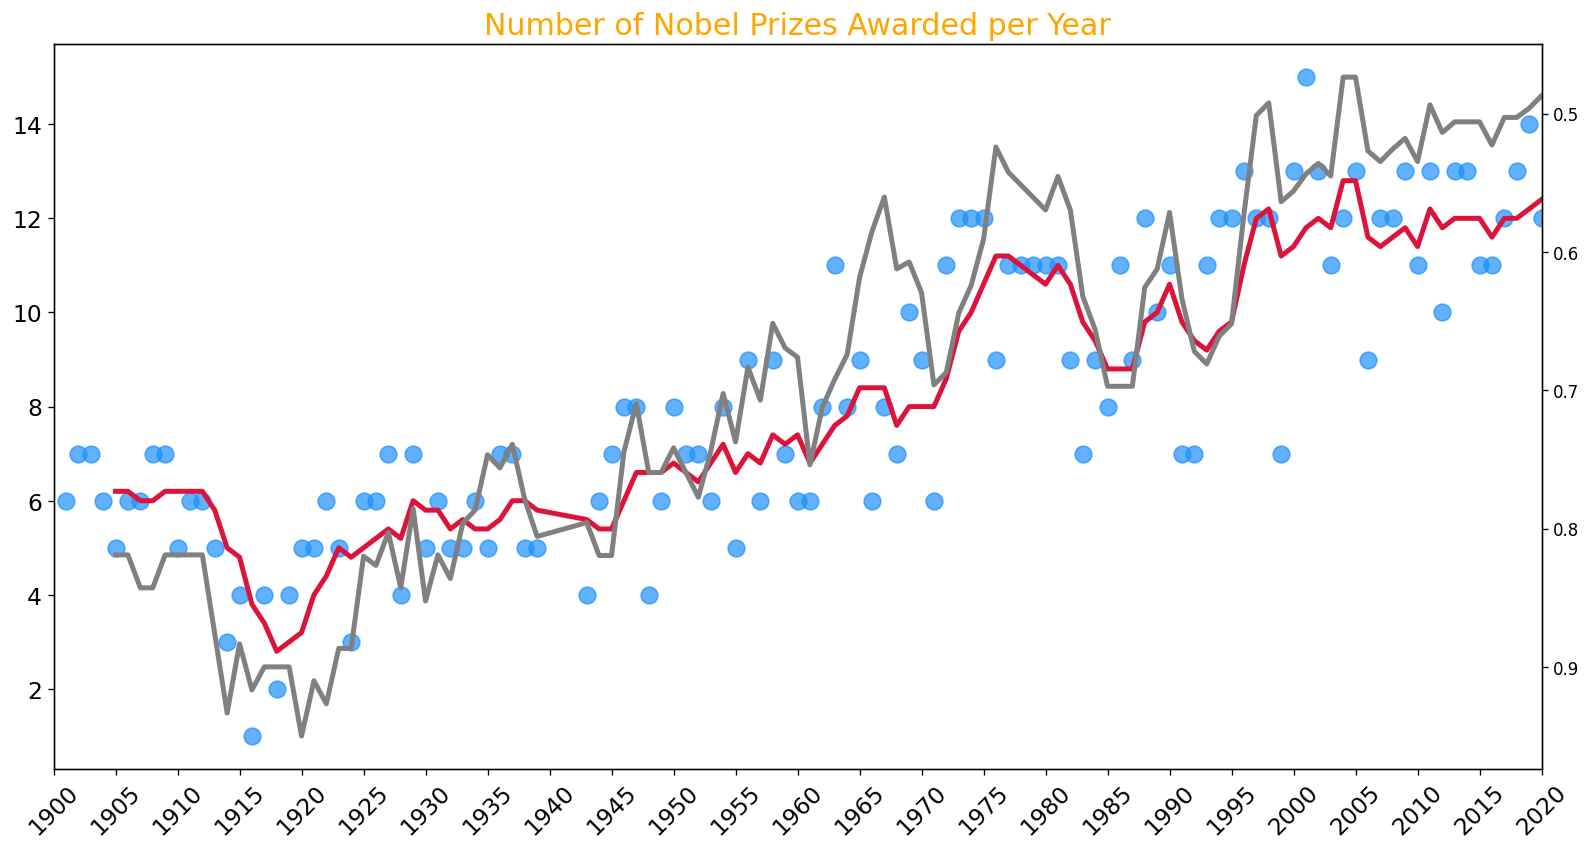

In [ ]:
plt.figure(figsize=(16, 8), dpi=120)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18, color="orange")
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14,
           rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(awards_by_year.index, 
           awards_by_year.prize, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(awards_by_year.index, 
        rolled_awards_by_year.values, 
        c='crimson', 
        linewidth=3,)

ax2 = ax.twinx()
ax2.invert_yaxis()

ax2.plot(
    awards_by_year.index,
    rolled_average_share_by_year.share_pct,
    c="grey",
    linewidth=3
)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [ ]:
top_countries = df_data.groupby("birth_country_current", as_index=False).agg({"prize": pd.Series.count})
top_countries.sort_values("prize", inplace=True)
top20_countries = top_countries[-20:]

In [ ]:
fig = px.bar(
    x=top20_countries.prize,
    y=top20_countries.birth_country_current,
    orientation="h",
    custom_data=[top20_countries.prize, top20_countries.birth_country_current],
    title="Top 20 Countries by Number of Prizes",
    color=top20_countries.prize,
    color_continuous_scale='Viridis',

)
fig.update_layout(
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
    coloraxis_showscale=False,
    # yaxis={"categoryorder":'total ascending'}
)
fig.update_traces(
    hovertemplate="Country=%{customdata[1]}<br>Awards=%{customdata[0]}"
)

# Use a Choropleth Map to Show the Number of Prizes Won by Country

In [ ]:
df_countries= df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize": pd.Series.count})
df_countries.sort_values("prize", ascending=False, inplace=True)

In [ ]:
fig = px.choropleth(
    df_countries,
    locations="ISO",
    color="prize",
    hover_name="birth_country_current",
    color_continuous_scale=px.colors.sequential.matter,  
)

fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?



In [ ]:
# new_df = df_data[df_data.birth_country_current == ]
df_country_and_cat_count= df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})


In [ ]:
# top20_countries.rename(columns={"prize":"total_prize"}, inplace=True)
final_df = pd.merge(df_country_and_cat_count, top20_countries, on="birth_country_current")

,birth_country_current,category,prize,total_prize
9,Belgium,Chemistry,1,9
10,Belgium,Literature,1,9
11,Belgium,Medicine,3,9
12,Belgium,Peace,3,9
13,Belgium,Physics,1,9


In [ ]:
fig = px.bar(
    final_df,
    x="prize",
    y="birth_country_current",
    color="category",
    orientation="h",
    custom_data=[final_df.category, final_df.prize, final_df.total_prize],
    title="Number of Prizes by Country and Category of the top 20 Countries",
)

fig.update_layout(
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
    yaxis={"categoryorder":'total ascending'}
    )

fig.update_traces(
    hovertemplate="Category=%{customdata[0]}<br>Prizes=%{customdata[1]}<br>Total=%{customdata[2]}"
)

fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [ ]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year.head(10)

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
313,1902,Netherlands,2
236,1902,India,1
160,1902,Germany,2
441,1902,Switzerland,2
467,1903,United Kingdom,1


In [ ]:
cumulative_prize_by_year = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prize_by_year.reset_index(inplace=True)
fig = px.line(
    cumulative_prize_by_year,
    x="year",
    y="prize",
    color="birth_country_current",
     hover_name='birth_country_current',
)
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Prizes',)
 
fig.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [ ]:
top_20_research_organisations = df_data.groupby("organization_name", as_index=False).agg({"prize": pd.Series.count}).sort_values("prize", ascending=False)[:20]

In [ ]:
fig = px.bar(
    top_20_research_organisations,
    x="prize",
    y="organization_name",
    orientation="h",
    title="Top 20 Research Organizations",
    color="prize",
    color_continuous_scale='Viridis',
    custom_data=[top_20_research_organisations.prize, top_20_research_organisations.organization_name],

)
fig.update_layout(
    xaxis_title="Number of Prizes",
    yaxis_title="Research Organization",
    yaxis={"categoryorder":"total ascending"},
    coloraxis_showscale=False,
)
   
fig.update_traces(
    hovertemplate="Organization=%{customdata[1]}<br>Prizes=%{customdata[0]}"
)

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [ ]:
top_research_cities = df_data.groupby('organization_city', as_index=False).agg({"prize": pd.Series.count})
top_research_cities.sort_values("prize", inplace=True)
top_research_cities = top_research_cities[-20:]

In [ ]:
fig = px.bar(
    top_research_cities,
    x="prize",
    y="organization_city",
    orientation="h",
    title="Top 20 Research Cities",
    color="prize",
    color_continuous_scale=px.colors.sequential.Plasma,
    custom_data=[top_research_cities.prize, top_research_cities.organization_city],

)
fig.update_layout(
    xaxis_title="Number of Prizes",
    yaxis_title="Research Cities",
    yaxis={"categoryorder":"total ascending"},
    coloraxis_showscale=False,
)
   
fig.update_traces(
    hovertemplate="City=%{customdata[1]}<br>Prizes=%{customdata[0]}"
)

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [ ]:
laureates_birth_cities = df_data.birth_city.value_counts()[:20]
laureates_birth_cities.sort_values(ascending=True, inplace=True)

In [ ]:
fig = px.bar(
    x=laureates_birth_cities.values,
    y=laureates_birth_cities.index,
    orientation="h",
    title="Where were the Nobel Laureates Born",
    color=laureates_birth_cities.values,
    color_continuous_scale=px.colors.sequential.Plasma,
    custom_data=[laureates_birth_cities.values, laureates_birth_cities.index],

)
fig.update_layout(
    xaxis_title="Number of Laureates",
    yaxis_title="City",
    # yaxis={"categoryorder":"total ascending"},
    coloraxis_showscale=False,
)
   
fig.update_traces(
    hovertemplate="City=%{customdata[1]}<br>Prizes=%{customdata[0]}"
)

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 



In [ ]:
organization_data = df_data.groupby(["organization_name", "organization_city", "organization_country"], as_index=False).agg({"prize": pd.Series.count}).reset_index()

In [ ]:
fig = px.sunburst(
    organization_data,
    path=["organization_country", "organization_city", "organization_name"],
    values="prize",
    title="Organization Data"
)
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame.


In [ ]:
birth_date_data = pd.DatetimeIndex(df_data.birth_date)
birth_year = birth_date_data.year
df_data["winning_age"] = df_data.year - pd.Series(birth_year)

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [ ]:
df_data.loc[[df_data.winning_age.idxmin(), df_data.winning_age.idxmax()]]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


In [ ]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

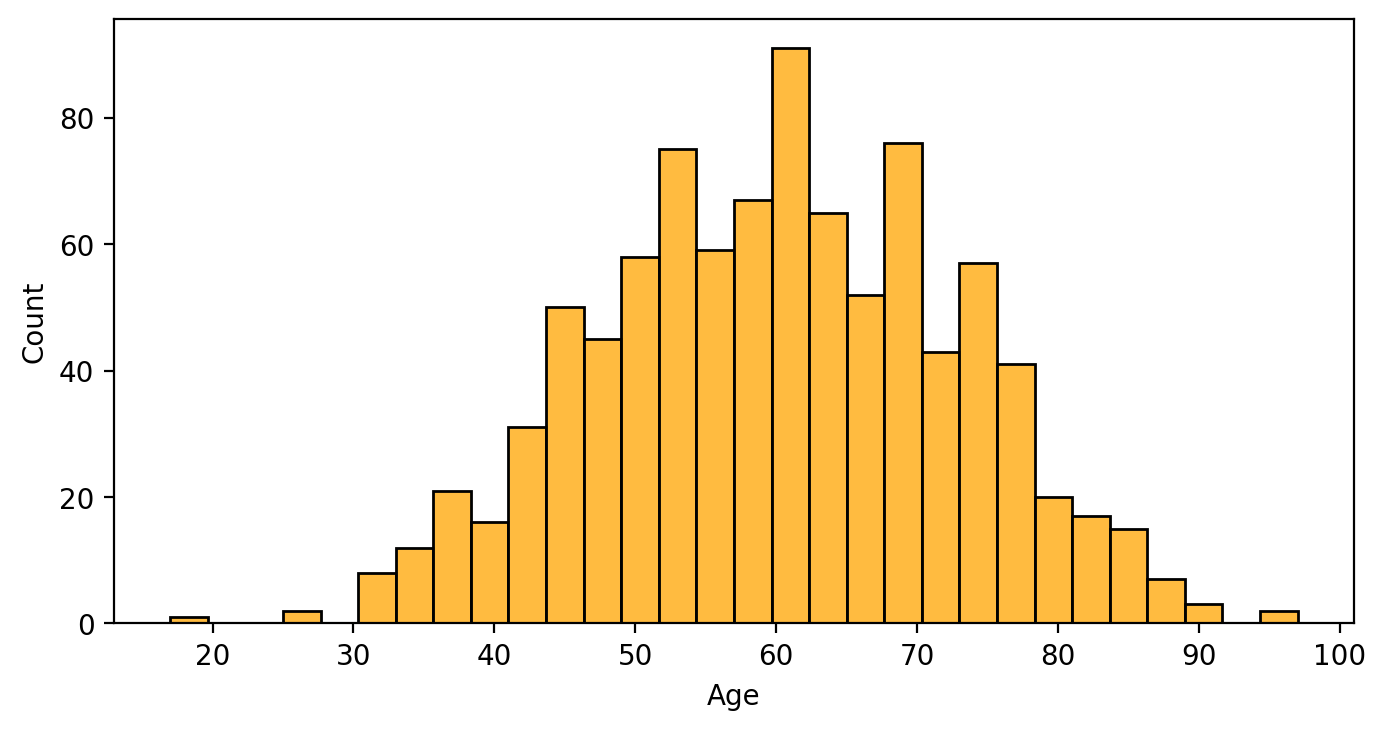

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
fig = sns.histplot(
    data=df_data,
    x=df_data.winning_age,
    bins=30,
    color="orange",
)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

In [ ]:
age_data = df_data.winning_age.value_counts()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



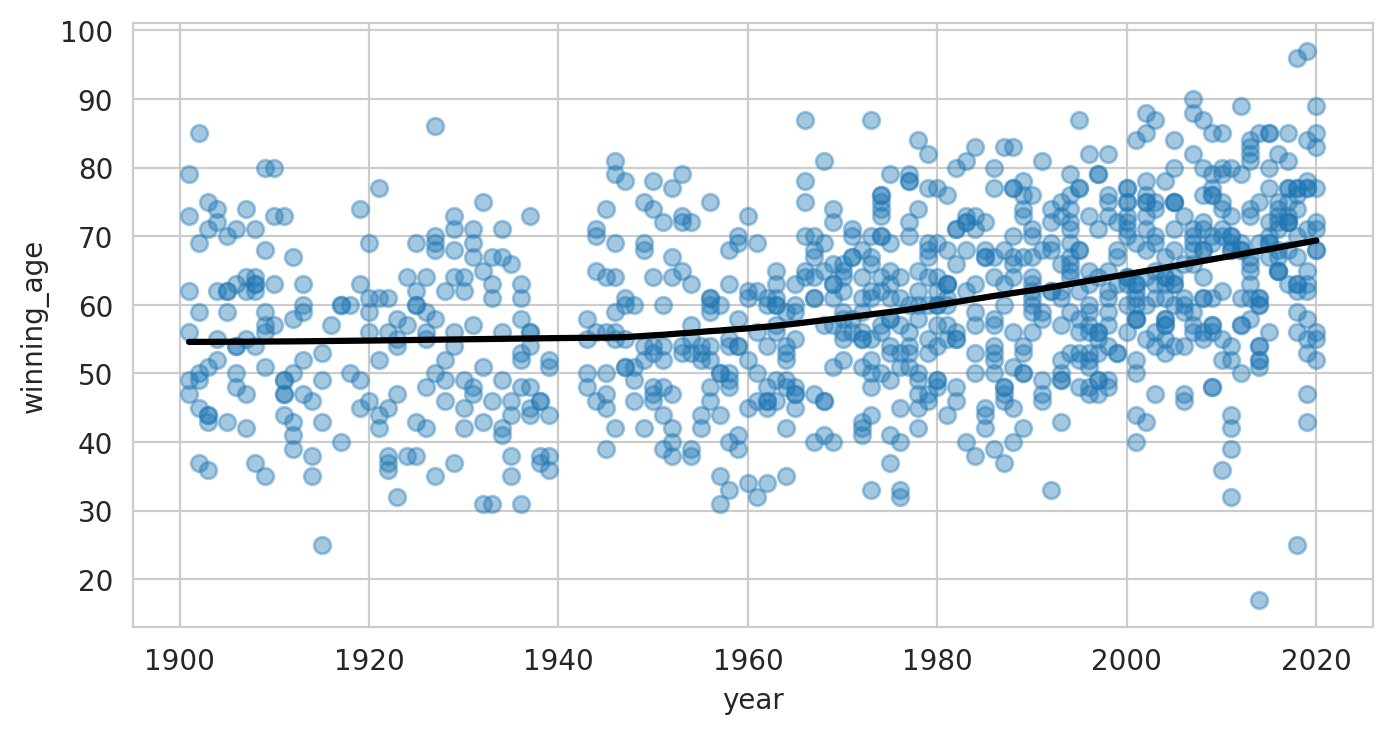

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct',
       'winning_age'],
      dtype='object')

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

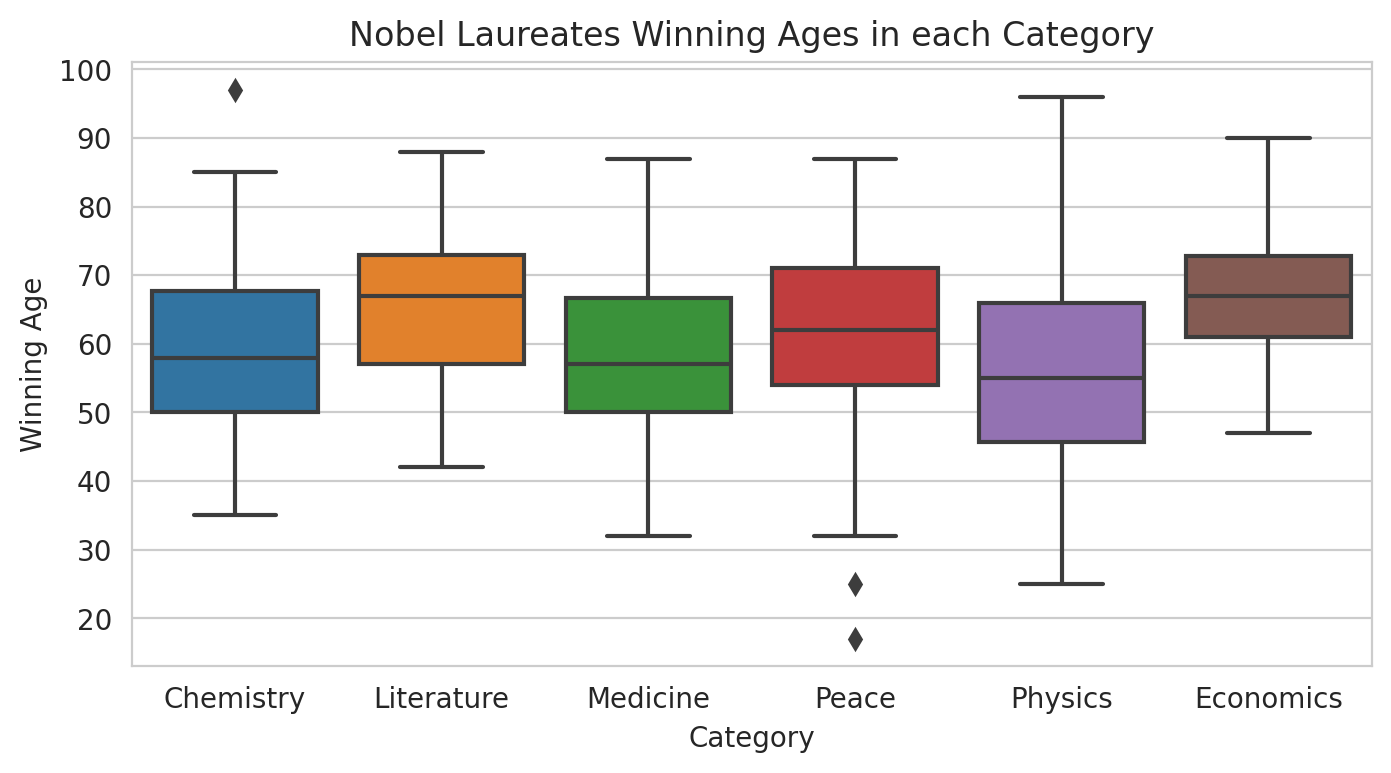

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
# plt.title("Nobel Laureates Winning Ages in each Category")
with sns.axes_style("whitegrid"):
  axes = sns.boxplot(
      x=df_data.category,
      y=df_data.winning_age,
  )

plt.ylabel('Winning Age')
plt.xlabel('Category')
plt.title('Nobel Laureates Winning Ages in each Category')
plt.show()

In [ ]:
px.box(
    x=df_data.category,
    y=df_data.winning_age,
    color=df_data.category,
    points="all",
    # notched=True,
    labels={"x":"Category", "y":"Age"},
    title="Nobel Laureates Winning Ages in each Category",

)

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 1680x960 with 0 Axes>

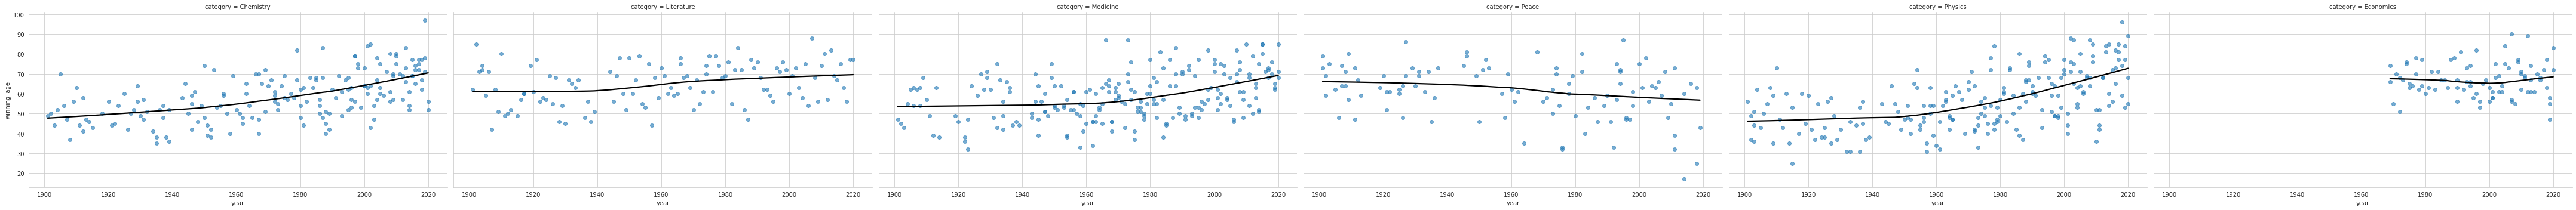

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
with sns.axes_style("whitegrid"):
   sns.lmplot(
       data=df_data,
       x="year",
       y="winning_age",
       lowess=True,
       col="category",
       aspect=2,
       scatter_kws = {'alpha': 0.6},
       line_kws = {'color': 'black'},
  )
plt.show()

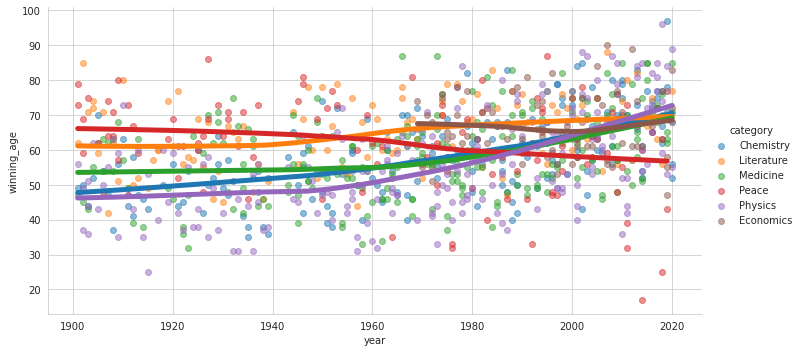

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()